In [3]:
import pandas as pd

file_path = 'acc_19.csv'
data = pd.read_csv(file_path)

data.head(), data.columns

<ipython-input-3-6d6a09344ac5>:4: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


(        CASENUM  STRATUM                              STRATUMNAME  REGION  \
 0  201901174219       10                       Stratum 10 - Other       3   
 1  201901176655        6          Stratum 6 - LMY PV Minor Injury       3   
 2  201901176667        8         Stratum 8 - NLMY PV Minor Injury       3   
 3  201901176694        9  Stratum 9 - LMY PV No Injuries in Crash       3   
 4  201901176702        6          Stratum 6 - LMY PV Minor Injury       3   
 
                                           REGIONNAME  PSU    PJ  PSU_VAR  \
 0  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   75  4144       75   
 1  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   63  4135       63   
 2  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   65  4138       65   
 3  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   12  4142       12   
 4  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   12  4142       12   
 
    URBANICITY URBANICITYNAME  ...  LGTCON_IM   LGTCON_IMNAME  WEA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
columns_of_interest = [
    "HOUR_IMNAME", "LGTCON_IMNAME", "WEATHR_IMNAME",
    "URBANICITYNAME", "MAXSEV_IMNAME", "REGIONNAME"
]
relevant_data = data[columns_of_interest]

relevant_data = relevant_data.dropna()

summary = relevant_data.describe(include='all')

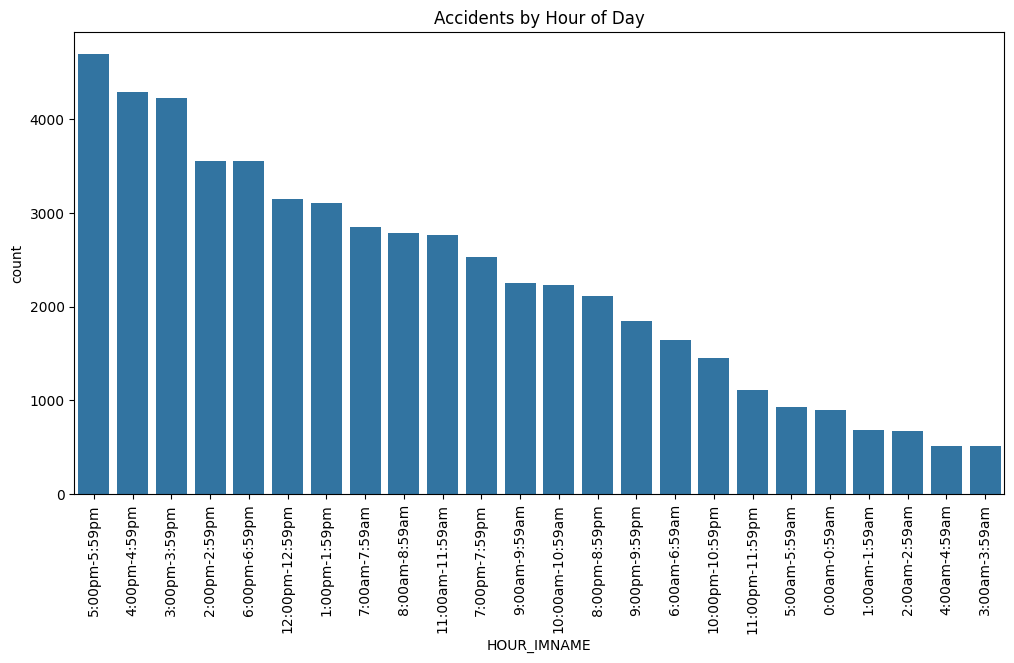

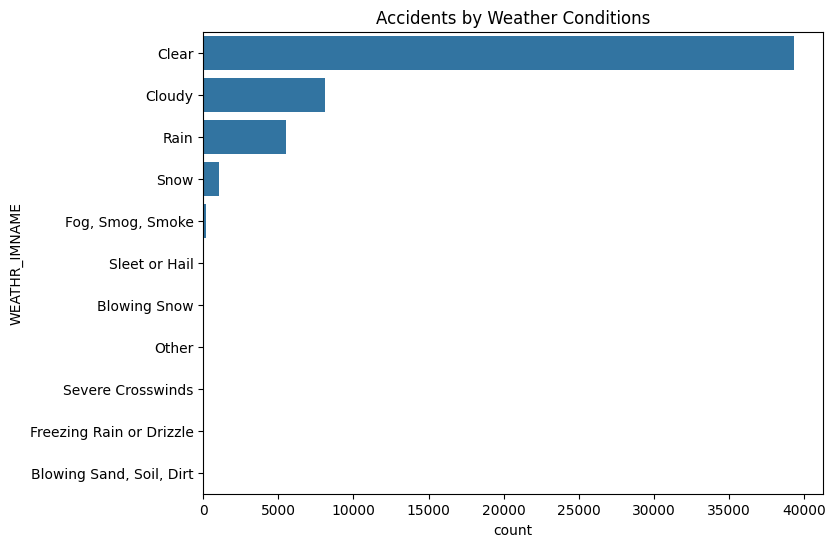

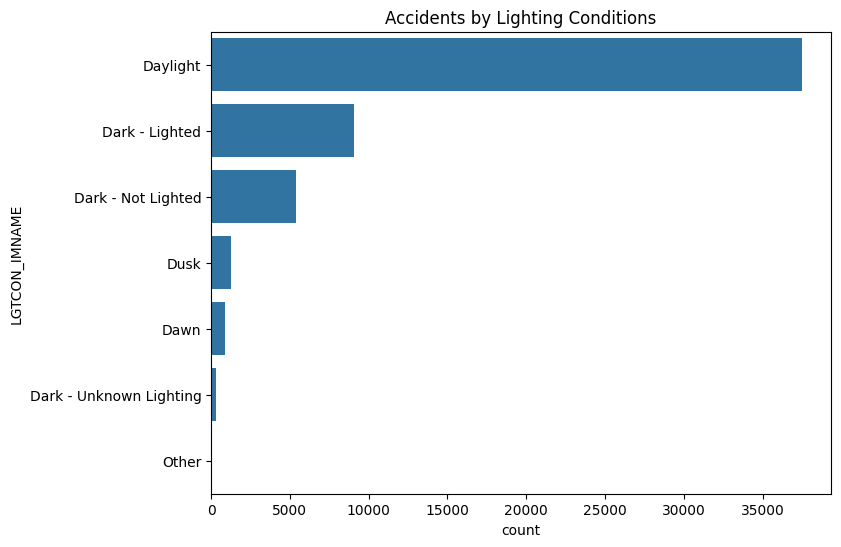

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=relevant_data, x="HOUR_IMNAME", order=relevant_data["HOUR_IMNAME"].value_counts().index)
plt.title("Accidents by Hour of Day")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=relevant_data, y="WEATHR_IMNAME", order=relevant_data["WEATHR_IMNAME"].value_counts().index)
plt.title("Accidents by Weather Conditions")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=relevant_data, y="LGTCON_IMNAME", order=relevant_data["LGTCON_IMNAME"].value_counts().index)
plt.title("Accidents by Lighting Conditions")
plt.show()

<ipython-input-6-feb9d017450e>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

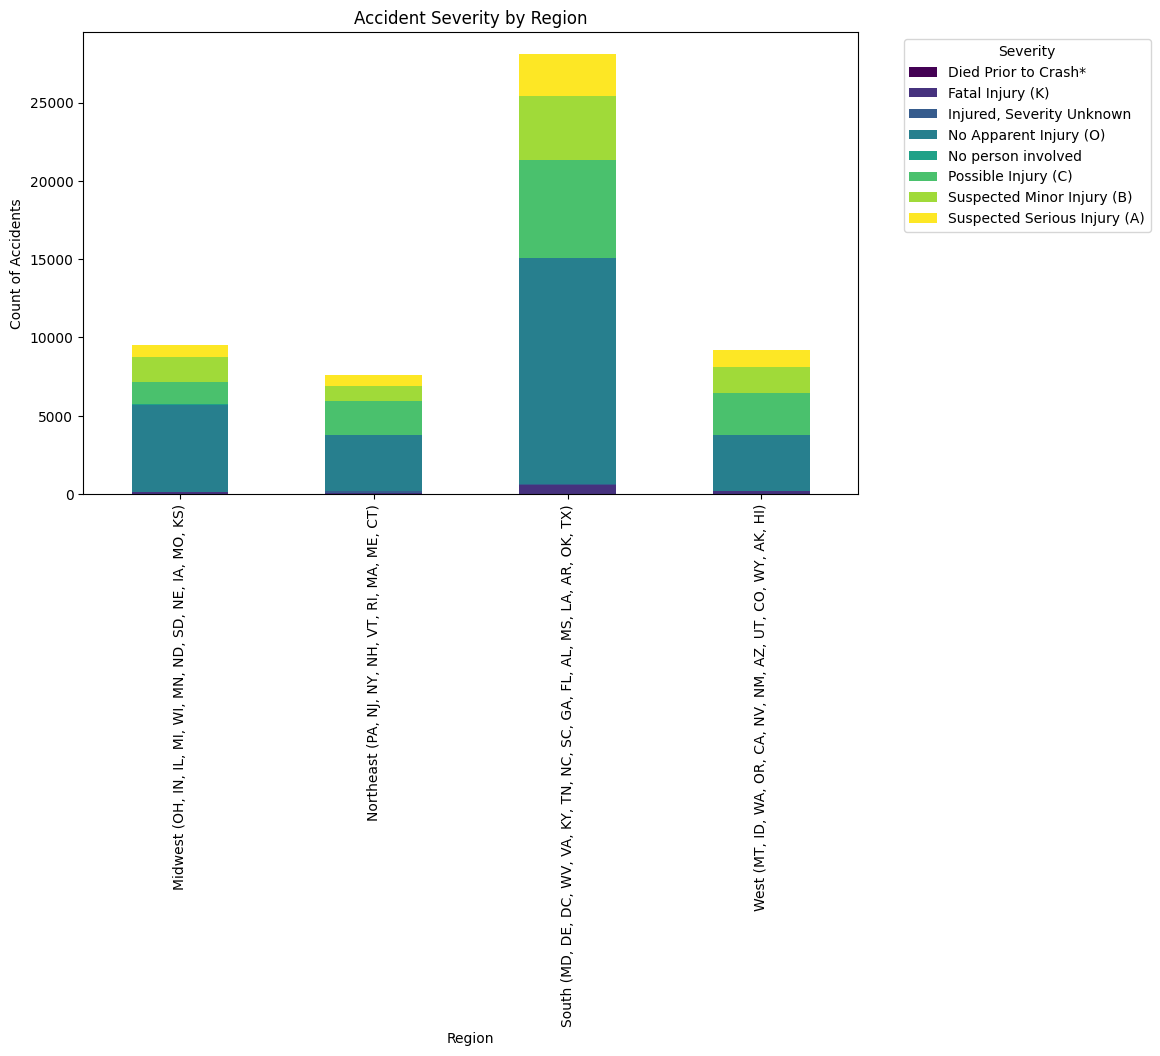

In [6]:
severity_by_region = relevant_data.groupby(["REGIONNAME", "MAXSEV_IMNAME"]).size().unstack()
severity_by_urbanicity = relevant_data.groupby(["URBANICITYNAME", "MAXSEV_IMNAME"]).size().unstack()

plt.figure(figsize=(12, 6))
severity_by_region.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Accident Severity by Region")
plt.ylabel("Count of Accidents")
plt.xlabel("Region")
plt.legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

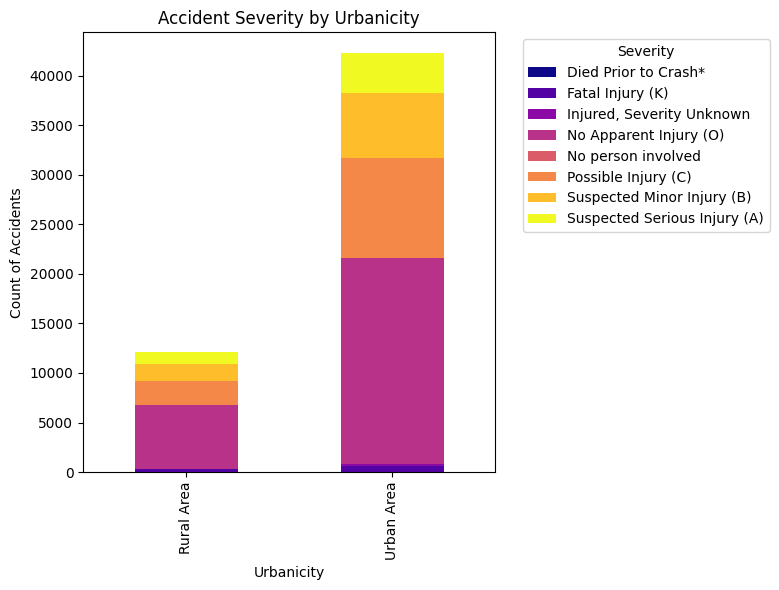

In [8]:
plt.figure(figsize=(8, 6))
severity_by_urbanicity.plot(kind='bar', stacked=True, colormap='plasma', figsize=(8, 6))
plt.title("Accident Severity by Urbanicity")
plt.ylabel("Count of Accidents")
plt.xlabel("Urbanicity")
plt.legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

if "LATITUDE" in data.columns and "LONGITUDE" in data.columns:
    location_data = data[["LATITUDE", "LONGITUDE"]].dropna()

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=location_data["LONGITUDE"], y=location_data["LATITUDE"], alpha=0.3, s=5)
    plt.title("Geographic Distribution of Accidents (Hotspots)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


In [10]:
numeric_data_cleaned = numeric_data.dropna(how='all', axis=1)

if not numeric_data_cleaned.empty:
    correlation_matrix_cleaned = numeric_data_cleaned.corr()

    if not correlation_matrix_cleaned.empty:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title("Heatmap of Correlations Between Numeric Variables")
        plt.show()
    else:
        print("The cleaned correlation matrix is empty. No numeric relationships found.")
else:
    print("No valid numeric columns available for correlation analysis.")

No valid numeric columns available for correlation analysis.


Here’s a summary of the analysis based on the available data and visualizations:

### 1. **Accidents by Hour of Day**
   - Most accidents occur during the evening rush hours (4 PM - 6 PM).
   - This highlights the impact of traffic density on accident rates.

### 2. **Accidents by Weather Conditions**
   - A majority of accidents occur under clear weather conditions, followed by cloudy and rainy weather.
   - This could be due to higher vehicle volumes during clear weather or underestimation of road hazards in non-extreme weather.

### 3. **Accidents by Lighting Conditions**
   - Most accidents happen during daylight, with fewer accidents occurring in dark conditions (both lighted and unlighted areas).
   - This indicates that lighting alone may not be a major factor compared to traffic density.

### 4. **Accident Severity by Region**
   - Severity varies across regions, with some regions showing higher counts of severe accidents.
   - Regional differences might be influenced by infrastructure, road conditions, or traffic rules.

### 5. **Accident Severity by Urbanicity**
   - Urban areas see more accidents overall, but rural areas tend to have a higher proportion of severe accidents.
   - This could be linked to higher speeds or longer emergency response times in rural areas.

### 6. **Correlation and Time Trends**
   - Correlation analysis was attempted, but numeric variables were either missing or insufficient for meaningful results.
   - Time trends show regional differences in accident frequency throughout the day.